<a href="https://colab.research.google.com/github/SolFreire/SingleLayerPerceptronNetworkDermatologyProblem/blob/main/SingleLayerPerceptronNetworkDermatologyProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns

In [2]:
class PerceptronMulticlass:
    def __init__(self, n_features, n_classes, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.n_classes = n_classes
        self.weights = torch.randn(n_classes, n_features, dtype=torch.float32)
        self.bias = torch.full((n_classes,), -1.0)
        self.errors_per_epoch = []

    def activation(self, x):
        return torch.where(x >= 0, 1.0, 0.0)

    def fit(self, X, y_one_hot):
        X = torch.tensor(X, dtype=torch.float32)
        y_one_hot = torch.tensor(y_one_hot, dtype=torch.float32)

        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y_one_hot):
                z = torch.matmul(self.weights, xi) + self.bias
                y_pred = self.activation(z)
                update = self.lr * (target - y_pred)
                if torch.any(update != 0):

                    for j in range(self.n_classes):
                        self.weights[j] += update[j] * xi
                        self.bias[j] += update[j]
                    errors += 1

            self.errors_per_epoch.append(errors)

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        z = torch.matmul(self.weights, X.T).T + self.bias
        return torch.argmax(z, dim=1).numpy()

In [3]:
! pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
dermatology = fetch_ucirepo(id=33)

# data (as pandas dataframes)
X = dermatology.data.features
y = dermatology.data.targets

# metadata
print(dermatology.metadata)

# variable information
print(dermatology.variables)


{'uci_id': 33, 'name': 'Dermatology', 'repository_url': 'https://archive.ics.uci.edu/dataset/33/dermatology', 'data_url': 'https://archive.ics.uci.edu/static/public/33/data.csv', 'abstract': 'Aim for this dataset is to determine the type of Eryhemato-Squamous Disease.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 366, 'num_features': 34, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5FK5P', 'creators': ['Nilsel Ilter', 'H. Guvenir'], 'intro_paper': {'ID': 387, 'type': 'NATIVE', 'title': 'Learning differential diagnosis of erythemato-squamous diseases using voting feature intervals', 'authors': 'H. Altay Güvenir, G. Demiröz, N. Ilter', 'venue': 'Artif. Intell. Medicine', 'year': 1998, 'journal': No

In [4]:
X['age'].isna().sum()


np.int64(8)

In [5]:
X['age'].describe()


,age
count,358.000000
mean,36.296089
std,15.324557
min,0.000000
25%,25.000000
50%,35.000000
75%,49.750000
max,75.000000


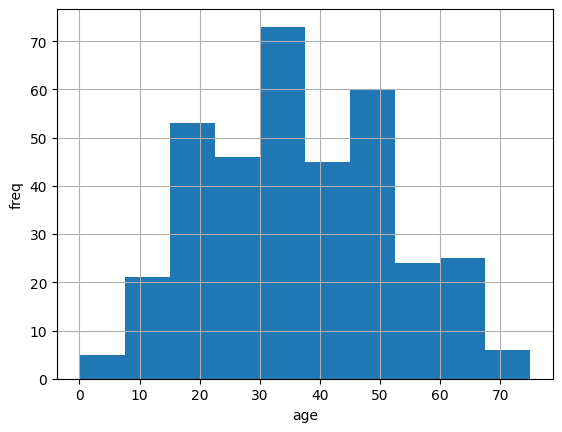

In [6]:


X['age'].hist()
plt.xlabel('age')
plt.ylabel('freq')
plt.show()


In [8]:
X['age'].fillna(X['age'].mean(), inplace=True)
X['age'].isna().sum()


/tmp/ipython-input-1221919272.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].mean(), inplace=True)
/tmp/ipython-input-1221919272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].mean(), inplace=True)


np.int64(0)

In [9]:
X.describe()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.155687
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,36.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


In [10]:
print(y)

     class
0        2
1        1
2        3
3        1
4        3
..     ...
361      4
362      4
363      3
364      3
365      1

[366 rows x 1 columns]


In [12]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[1 0 2 0 2 1 4 2 3 3 0 1 1 0 2 3 1 0 2 4 5 1 4 2 4 0 5 4 1 2 0 1 0 0 3 1 2
 1 2 0 1 3 0 1 4 2 3 5 1 2 2 3 0 0 4 0 1 2 3 1 5 0 4 0 1 2 0 3 4 0 1 5 2 4
 3 1 1 0 2 4 0 1 1 1 4 0 0 2 0 3 1 1 4 0 2 3 1 4 0 5 1 4 0 1 1 0 3 0 2 0 0
 2 4 2 2 4 1 2 3 0 1 4 5 0 0 1 5 2 4 3 0 0 2 4 4 0 3 1 2 0 1 0 0 2 2 2 1 4
 3 1 1 0 0 0 4 2 1 2 1 1 3 1 2 5 1 0 0 2 3 2 2 0 0 0 2 0 0 1 2 2 0 0 0 0 5
 1 1 1 1 0 2 2 2 0 0 1 2 1 1 1 4 4 4 4 4 0 0 0 0 0 0 0 2 2 2 2 2 2 3 3 3 3
 4 4 4 4 4 4 4 1 1 1 1 0 0 0 0 0 0 5 5 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 3 3 3
 3 3 3 4 4 4 4 5 5 5 3 3 3 0 0 0 0 0 1 1 3 3 3 0 0 1 1 1 2 2 2 2 0 0 0 0 4
 4 4 4 4 2 2 2 3 0 0 3 3 3 0 0 0 2 2 2 2 2 0 0 0 0 3 3 0 0 3 2 2 3 0 0 3 3
 4 4 0 0 4 4 2 0 4 4 5 5 3 3 5 5 5 0 0 0 4 4 0 0 0 0 1 1 3 3 2 2 0]


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
y_onehot = np.eye(6)[y]
print(y_onehot)

[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [15]:
type(X)

pandas.core.frame.DataFrame

In [16]:
type(y)

numpy.ndarray

In [19]:
X = X.to_numpy()



AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [20]:
type(X)

numpy.ndarray

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Realização 1: Acurácia = 0.1622
Realização 2: Acurácia = 0.0676
Realização 3: Acurácia = 0.1486
Realização 4: Acurácia = 0.1351
Realização 5: Acurácia = 0.2568
Realização 6: Acurácia = 0.2027
Realização 7: Acurácia = 0.0946
Realização 8: Acurácia = 0.3108
Realização 9: Acurácia = 0.1757
Realização 10: Acurácia = 0.2703
Realização 11: Acurácia = 0.1622
Realização 12: Acurácia = 0.4595
Realização 13: Acurácia = 0.1486
Realização 14: Acurácia = 0.2432
Realização 15: Acurácia = 0.1081
Realização 16: Acurácia = 0.1351
Realização 17: Acurácia = 0.3649
Realização 18: Acurácia = 0.0946
Realização 19: Acurácia = 0.2703
Realização 20: Acurácia = 0.1216

Resultados gerais:
Acurácia média: 0.1966
Desvio padrão:  0.0982
Melhor realização: 12 (Acurácia = 0.4595)


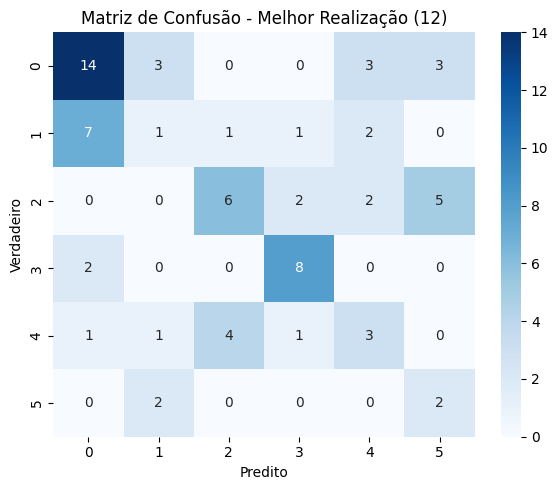

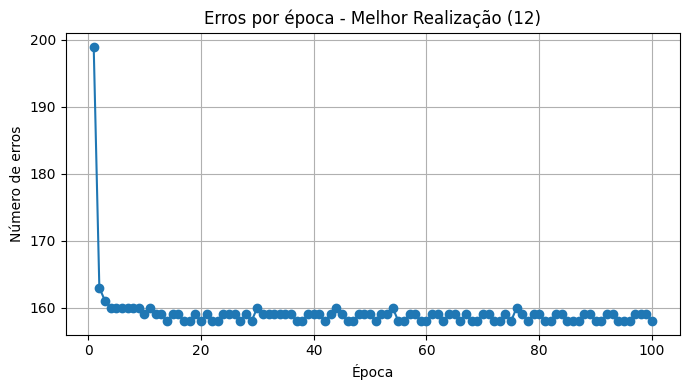

In [27]:
accuracies = []
conf_matrices = []
errors_runs = []

for run in range(20):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=run
    )

    model = PerceptronMulticlass(34, 6, lr=0.01, epochs=100)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    errors_runs.append(model.errors_per_epoch.copy())

    print(f"Realização {run+1}: Acurácia = {acc:.4f}")


mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
best_run = np.argmax(accuracies)

print("\nResultados gerais:")
print(f"Acurácia média: {mean_acc:.4f}")
print(f"Desvio padrão:  {std_acc:.4f}")
print(f"Melhor realização: {best_run+1} (Acurácia = {accuracies[best_run]:.4f})")


best_conf = conf_matrices[best_run]

plt.figure(figsize=(6, 5))
sns.heatmap(best_conf, annot=True, fmt="d", cmap="Blues")
plt.title(f"Matriz de Confusão - Melhor Realização ({best_run+1})")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()


best_errors = errors_runs[best_run]

plt.figure(figsize=(7, 4))
plt.plot(range(1, len(best_errors)+1), best_errors, marker='o')
plt.title(f"Erros por época - Melhor Realização ({best_run+1})")
plt.xlabel("Época")
plt.ylabel("Número de erros")
plt.grid(True)
plt.tight_layout()
plt.show()